# Linear Models for Classification: Wine Dataset

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook (this is the way we will do it for evaluating your HWs!)

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline



We first import the dataset we are going to use.

In [3]:
#let's import the sklearn library
import sklearn

#let's print out the version of scikit-learn

print(sklearn.__version__)
#this imports the datasets module, which has useful datasets
from sklearn import datasets

# Load the dataset from scikit learn
wine = datasets.load_wine()

1.3.0


Let's check out the description of the dataset from the scikit learn documentation: https://scikit-learn.org/0.23/modules/classes.html#module-sklearn.datasets

(**Note**: we are considering the scikit-learn version that is installed in the labs Te and Ue, but there are more recent ones)

Now let's understand a little bit the data.

In [4]:
#let's print the data matrix

print(wine.data)
#let's print the dimension of the data matrix
print(wine.data.shape)

#let's print the target (labels)
print(wine.target)

#let's print the features names
print(wine.feature_names)

#let's print the targets names names
print(wine.target_names)


#let's print the description of the dataset
print(wine.DESCR)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0'

To simplify a bit the problem (and the presentation), we are going to classify class "1" vs the other two classes (0 and 2). We are going to relabel the other classes (0 and 2) as "-1".

For convenience, let's save the instances (vectors of features) in matrix $\mathbf{X}$ and the targets into a vector $\mathbf{Y}$.

In [5]:
X = wine.data
Y = wine.target

#let's print out the matrix of instances and the vector of targets, just to make sure that everything looks ok
print("Matrix of instances")
print(X)

print("Vector of labels")
print(Y)

Matrix of instances
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Vector of labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Let's relabel the labels for classes 0 and 2 as stated before.

In [6]:
#let's relabel classes 0 and 2 as -1
for i in range(len(Y)):
    if Y[i] != 1:
        Y[i]=-1

        
#let's print the new vector Y
print(Y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


## Data Preprocessing and Split into Training and Testing ##

Before we actually learn the model, it is important that we perform two operations:
1. split the data into a training set and a test set
2. normalize the features

**Note**: some of there operations can be done with scikit-learn functions, but we do them "manually" to get a better understanding of what is going on.

We now want to split the data into training and testing. Let's say we keep 80% of the data for training and 20% for testing. How do we split the data?

What about keeping the first 80% of the rows for training and the last 20% of rows for testing? Is it a good idea? NO because the are ordered by class (so they would not be iid)

Solution: Randomly permute rows, and then split dataset

**Note**: fix a seed to reproduce the results 

In [8]:
# we need to import numpy
import numpy as np
# set the random seed to your ID number
IDnumber = 4000000 
np.random.seed(IDnumber)

#let's generate a permutation among the number of rows
m=wine.data.shape[0]
permutation=np.random.permutation(m)
X_perm=X[permutation]
Y_perm=Y[permutation]
#let's print Y_perm
print(Y_perm)

[ 1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1 -1
  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1
  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1
 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1
  1  1 -1 -1 -1 -1  1 -1 -1 -1]


Let's split the data and save into 2 new data matrices/vectors.

In [12]:
fraction_train = 0.5
#fraction_test = 1-fraction_train
m_training=int(X_perm.shape[0]*fraction_train)
m_test=int(X_perm.shape[0])-m_training

89

In [16]:
X_training = X_perm[:m_training,:]
Y_training = Y_perm[:m_training]
X_test= X_perm[m_training:,:]
Y_test= Y_perm[m_training:]


We now center and scale the data to have unit variance. This is an important step for the stability of the computation and for other reasons. We are going to use the standard scaler from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [17]:
#load the StandardScaler module
from sklearn.preprocessing import StandardScaler

# we first "learn" the scaler function using the training data
#VERY IMPORTANT DONT SCALE ON TEST SET
scaler = StandardScaler().fit(X_training)

# we then apply the scaling function to both training and test data, since we want to simulate what happens when we have data for training and we have future data
X_train_scaled=scaler.transform(X_training)
X_test_scaled=scaler.transform(X_test)

#let's print the scaled version of X_traing_scaled
print(X_train_scaled)

[[-1.57163407 -0.14244664  1.450262   ... -0.03187005 -0.20716035
  -0.80555993]
 [ 1.49630798 -0.49898247 -0.21609606 ... -0.15887457  1.05785748
   0.90380173]
 [ 0.56203756 -0.52385707  0.9642409  ... -1.7252637  -1.16682905
  -0.28325498]
 ...
 [ 1.49630798  1.39977813  0.51293559 ... -0.37054878  1.37774704
   0.19156771]
 [-0.87724389  0.12288235  0.33935663 ... -0.75156235  1.15964052
  -0.90052446]
 [-1.73576265 -0.34973491 -1.53529619 ...  1.06883582 -0.6433734
  -0.93444037]]


## Learning a Model ##

We now need to decide which model/algorithm we are going to use for our classification task. There are several models available in scikit-learn: https://scikit-learn.org/0.23/index.html

We are going to start from the simplest models, that is, linear models: https://scikit-learn.org/0.23/modules/classes.html#module-sklearn.linear_model

How do we find the best hypothesis?

We need to define a loss function and then use Empirical Risk Minimization (ERM). 

What loss function does it make sense to use?

But what is the actual algorithm? We are going to consider the **Perceptron** algorithm: https://scikit-learn.org/0.23/modules/generated/sklearn.linear_model.Perceptron.html

Let's load the corresponding module in scikit-learn

In [20]:
from sklearn.linear_model import Perceptron

Let's us the Perceptron algorithm as implemented in scikit-learn. It proceeds in iterations.

The Perceptron has several parameters, some of which we will understand later on. An important one is $\texttt{tol}$, that represents how much the training error should improve in one iteration for the algorithm to continue.

In [22]:
#let's learn a model using Perceptron

#we first define the classifier, fixing the random state for reproducibility
percepetron_classifier = Perceptron(random_state=IDnumber,tol=1e-3)

#let's now learn the classifier (i.e., run the perceptron to fix the weights)
percepetron_classifier.fit(X_train_scaled,Y_training)

Perceptron(random_state=4000000)

Let's print out the model we learned.

In [26]:
print("Coeff of features in model we learned, we get the 13 w and the bias")
print(percepetron_classifier.coef_)
print(percepetron_classifier.intercept_)

Coeff of features in model we learned, we get the 13 w and the bias
[[-5.01266011 -3.67845854 -5.67778742  2.23936263 -0.93479946  1.38698445
   1.17398883  2.32207873  0.57740595 -4.69812785  2.73083509  0.21075462
  -4.45643572]]
[-2.]


How well does our method perform?

We need to compute the training error of the hypothesis $h_S$ we learned from the training set $S$. There is no function in python to compute the training error $L_S(h_S)$. However, there is a function to compute the \emph{score}, that for the 0-1 loss corresponds to $1 - L_S(h_S)$.

In [27]:
#let's compute the training error
training_error= 1.0-percepetron_classifier.score(X_train_scaled,Y_training)

#let's print the training error
print(training_error)

0.0


But we don't care about the training error... we are interested in the generalization error! How do we estimate it? Let's use some data that we did not use for training, that is what we called test data.

In [28]:
#let's compute the test error

test_error= 1.0-percepetron_classifier.score(X_test_scaled,Y_test)

#let's print the test error
print(test_error)

0.0337078651685393


## Impact of the amount of training data ##

We will now try to understand the impact of the amount of data we have for training.

To do this, we are going to train a model using a subset of the data with $10*i$ samples, for $i=1,2,3,\dots,10$, and then compute the training error and the test error.

In [34]:
#total number of samples, useful for later on
m_total = X.shape[0]

#two lists where to save the training error and the test error, useful for plotting
train_errors = list()
test_errors = list()

#let's define the learner we use in this part
perceptron_class = Perceptron(random_state = IDnumber, tol=1e-3 )

for i in range(1,10):
    # we now repeat all the previous steps
    # split into training and test
    m_training=i*10
    
    X_training = X_perm[:m_training,:]
    Y_training = Y_perm[:m_training]
    X_test= X_perm[m_training:,:]
    Y_test= Y_perm[m_training:]
    
    #scale the data according to the training test, for both training and testing
    
    scaler = StandardScaler().fit(X_training)
    
    X_train_scaled=scaler.transform(X_training)
    X_test_scaled=scaler.transform(X_test)

    
    #let's now learn the classifier (i.e., run the perceptron to fix the weights

    perceptron_class.fit(X_train_scaled,Y_training)
    train_errors.append(1.0-perceptron_class.score(X_train_scaled,Y_training))
    test_errors.append(1.0-perceptron_class.score(X_test_scaled,Y_test))
print(train_errors)
print(test_errors)
    


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.11904761904761907, 0.10759493670886078, 0.10135135135135132, 0.08695652173913049, 0.0390625, 0.05932203389830504, 0.05555555555555558, 0.030612244897959218, 0.05681818181818177]


Now let's plot the training and test error as a function of the training dataset size.

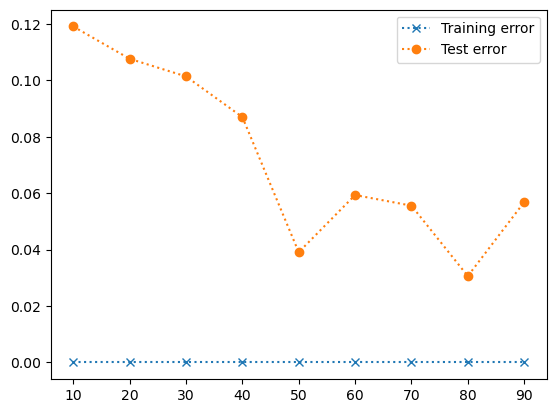

In [35]:
#the following is to have the plots appearing inline
%matplotlib inline

#import the pyplot module from matplotlib for plotting (functions are similar to matlab)
import matplotlib.pyplot as plt

x_axis=range(10,100,10)
plt.plot(x_axis,train_errors,'x:')
plt.plot(x_axis,test_errors,'o:')
plt.legend(["Training error","Test error"])

## Impact of initial conditions by the perceptron 

Note that the solution found by the Perceptron algorithm depends on the initial condition. Let's learn a model with a different random seed for the Perceptron and see how different the model is from the previous one.

In [38]:
#let's learn a new model using Perceptron
percepetron_classifier2 = Perceptron(random_state=2*IDnumber,tol=1e-3)
percepetron_classifier2.fit(X_train_scaled,Y_training) 
training_error= 1.0-percepetron_classifier2.score(X_train_scaled,Y_training)
test_error= 1.0-percepetron_classifier2.score(X_test_scaled,Y_test)


print(training_error)
print(test_error)

0.0
0.045454545454545414


## Impact of normalization

Let's try to understand what the impact of scaling data is. Let's learn a model without without normalizing the data.

In [41]:
#let's learn a new model using Perceptron
percepetron_classifier2 = Perceptron(random_state=2*IDnumber,tol=1e-3)
percepetron_classifier2.fit(X_training,Y_training) 
training_error= 1.0-percepetron_classifier2.score(X_training,Y_training)
test_error= 1.0-percepetron_classifier2.score(X_test,Y_test)


print(training_error)
print(test_error)
print("much higher error")

0.28888888888888886
0.21590909090909094


In [44]:
print("OLD, scaled")
print(percepetron_classifier.coef_)
print(percepetron_classifier.intercept_)

print("NEW,not scaled")
print(percepetron_classifier2.coef_)
print(percepetron_classifier2.intercept_)

print("the weights for each feature are very different! not comparable")

OLD, scaled
[[-5.01266011 -3.67845854 -5.67778742  2.23936263 -0.93479946  1.38698445
   1.17398883  2.32207873  0.57740595 -4.69812785  2.73083509  0.21075462
  -4.45643572]]
[-2.]
NEW,not scaled
[[  756.48  -146.98   101.85  1622.2   5318.     206.85   270.37    19.74
    168.14  -568.4    157.24   356.87 -1026.  ]]
[80.]
the weights for each feature are very different! not comparable


## Impact of number of iterations

Let's write the code that performs one iteration at the time, and let' compute the training error after iteration.

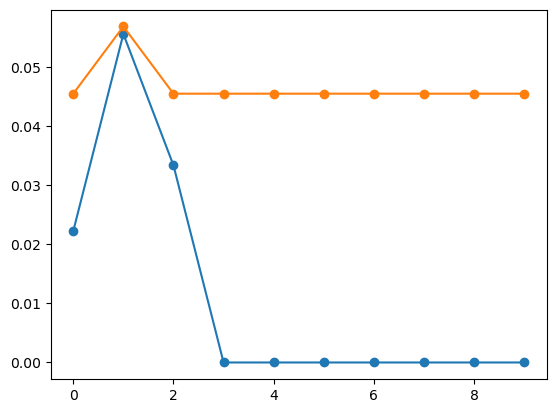

In [63]:
percepetron_class_single_iter=Perceptron(random_state=4*IDnumber)



train_errors=list()
test_errors=list()

for i in range(10):
    percepetron_class_single_iter.partial_fit(X_train_scaled,Y_training,classes=Y_training)
    training_error= 1.0-percepetron_class_single_iter.score(X_train_scaled,Y_training)
    test_error= 1.0-percepetron_class_single_iter.score(X_test_scaled,Y_test)
    train_errors.append(training_error)
    test_errors.append(test_error)
plt.plot(train_errors,marker='o')
plt.plot(test_errors,marker='o')

In [56]:
len(test_errors)

10